In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import seaborn as sb
from sklearn.preprocessing import LabelEncoder
 
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [16]:
df_10_10inst = pd.read_csv('C:/PSL_KNN/data_10_frames_10_instances.csv')

df_10_10inst['classes'] = df_10_10inst['videoname'].apply(lambda x: x.split('_')[0])
x_10_10inst = df_10_10inst.groupby('videoname').agg({'coordinate':lambda x: list(x)})
print(pd.unique(df_10_10inst['videoname']))


['aprender_175' 'aprender_18' 'aprender_195' 'aprender_217' 'aprender_27'
 'aprender_282' 'aprender_34' 'aprender_35' 'aprender_7' 'aprender__466'
 'bien_174' 'bien_230' 'bien_241' 'bien_288' 'bien_295' 'bien_337'
 'bien_39' 'bien_416' 'bien_561' 'bien_626' 'comer_144' 'comer_164'
 'comer_248' 'comer_313' 'comer_412' 'comer_422' 'comer_475' 'comer_625'
 'comer_712' 'comer_747' 'cuánto_405' 'cuánto_420' 'cuánto_445'
 'cuánto_448' 'cuánto_456' 'cuánto_460' 'cuánto_468' 'cuánto_483'
 'cuánto_703' 'cuánto_742' 'cómo_12' 'cómo_171' 'cómo_223' 'cómo_230'
 'cómo_379' 'cómo_427' 'cómo_44' 'cómo_85' 'cómo_9' 'cómo_90' 'dentro_241'
 'dentro_369' 'dentro_457' 'dentro_532' 'dentro_55' 'dentro_627'
 'dentro_647' 'dentro_664' 'dentro_692' 'dentro_73' 'emoción_143'
 'emoción_145' 'emoción_188' 'emoción_249' 'emoción_250' 'emoción_286'
 'emoción_43' 'emoción_54' 'emoción_71' 'emoción_93' 'fuerte_153'
 'fuerte_310' 'fuerte_314' 'fuerte_361' 'fuerte_362' 'fuerte_363'
 'fuerte_372' 'fuerte_459' 'fuerte_5

In [17]:
temp_10_10inst = pd.DataFrame(x_10_10inst['coordinate'].tolist())
temp_10_10inst.insert(0,"instance",['aprender_175','aprender_18','aprender_195','aprender_217','aprender_27'
,'aprender_282','aprender_34','aprender_35','aprender_7','aprender__466'
,'bien_174','bien_230','bien_241','bien_288','bien_295','bien_337'
,'bien_39','bien_416','bien_561','bien_626','comer_144','comer_164'
,'comer_248','comer_313','comer_412','comer_422','comer_475','comer_625'
,'comer_712','comer_747','cuánto_405','cuánto_420','cuánto_445'
,'cuánto_448','cuánto_456','cuánto_460','cuánto_468','cuánto_483'
,'cuánto_703','cuánto_742','cómo_12','cómo_171','cómo_223','cómo_230'
,'cómo_379','cómo_427','cómo_44','cómo_85','cómo_9','cómo_90','dentro_241'
,'dentro_369','dentro_457','dentro_532','dentro_55','dentro_627'
,'dentro_647','dentro_664','dentro_692','dentro_73','emoción_143'
,'emoción_145','emoción_188','emoción_249','emoción_250','emoción_286'
,'emoción_43','emoción_54','emoción_71','emoción_93','fuerte_153'
,'fuerte_310','fuerte_314','fuerte_361','fuerte_362','fuerte_363'
,'fuerte_372','fuerte_459','fuerte_571','fuerte_588','pensar_235'
,'pensar_450','pensar_461','pensar_600','pensar_613','pensar_623'
,'pensar_640','pensar_66','pensar_771','pensar_97','sentir_14'
,'sentir_149','sentir_16','sentir_38','sentir_458','sentir_53'
,'sentir_547','sentir_602','sentir_604','sentir_89','sí_159','sí_194'
,'sí_200','sí_278','sí_291','sí_306','sí_359','sí_419','sí_633','sí_659'
,'tú_205','tú_207','tú_229','tú_247','tú_277','tú_635','tú_691','tú_80'
,'tú_803','tú_96','yo_113','yo_119','yo_121','yo_125','yo_140','yo_152'
,'yo_164','yo_235','yo_237','yo_3'],True)


temp_10_10inst['classes'] = temp_10_10inst['instance'].apply(lambda x: x.split('_')[0])

temp_10_10inst
temp_10_10inst.instance.unique()

temp_10_10inst

temp_10_10inst_w1 = temp_10_10inst[~temp_10_10inst.classes.str.startswith('bien')]

temp_10_10inst_w2 = temp_10_10inst_w1[~temp_10_10inst_w1.classes.str.startswith('cuánto')]

temp_10_10inst_w3 = temp_10_10inst_w2[~temp_10_10inst_w2.classes.str.startswith('cómo')]

temp_10_10inst_w4 = temp_10_10inst_w3[~temp_10_10inst_w3.classes.str.startswith('dentro')]

temp_10_10inst_w5 = temp_10_10inst_w4[~temp_10_10inst_w4.classes.str.startswith('emoción')]
temp_10_10inst_w6 = temp_10_10inst_w5[~temp_10_10inst_w5.classes.str.startswith('fuerte')]
temp_10_10inst_w7 = temp_10_10inst_w6[~temp_10_10inst_w6.classes.str.startswith('sí')]
temp_10_10inst_w8 = temp_10_10inst_w7[~temp_10_10inst_w7.classes.str.startswith('tú')]
temp_10_10inst_w9 = temp_10_10inst_w8[~temp_10_10inst_w8.classes.str.startswith('yo')]

In [18]:
dataset_10_10inst_verbs =temp_10_10inst_w9.iloc[:,1:463]

In [19]:
print(pd.unique(dataset_10_10inst_verbs['classes']))

X_10_10inst_verbs= dataset_10_10inst_verbs.iloc[:,:-1].values
y_10_10inst_verbs=  dataset_10_10inst_verbs.iloc[:,-1].values


Labelencoder_Y = LabelEncoder()
y_10_10inst_verbs= Labelencoder_Y.fit_transform(y_10_10inst_verbs)
y_10_10inst_verbs

X_train_10_10inst_verbs, X_test_10_10inst_verbs, y_train_10_10inst_verbs, y_test_10_10inst_verbs = train_test_split(X_10_10inst_verbs, y_10_10inst_verbs, test_size = 0.25, random_state=0)
scaler = MinMaxScaler()
X_train_10_10inst_verbs = scaler.fit_transform(X_train_10_10inst_verbs)
X_test_10_10inst_verbs = scaler.transform(X_test_10_10inst_verbs)

['aprender' 'comer' 'pensar' 'sentir']


([<matplotlib.axis.XTick at 0x28306ca68c8>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

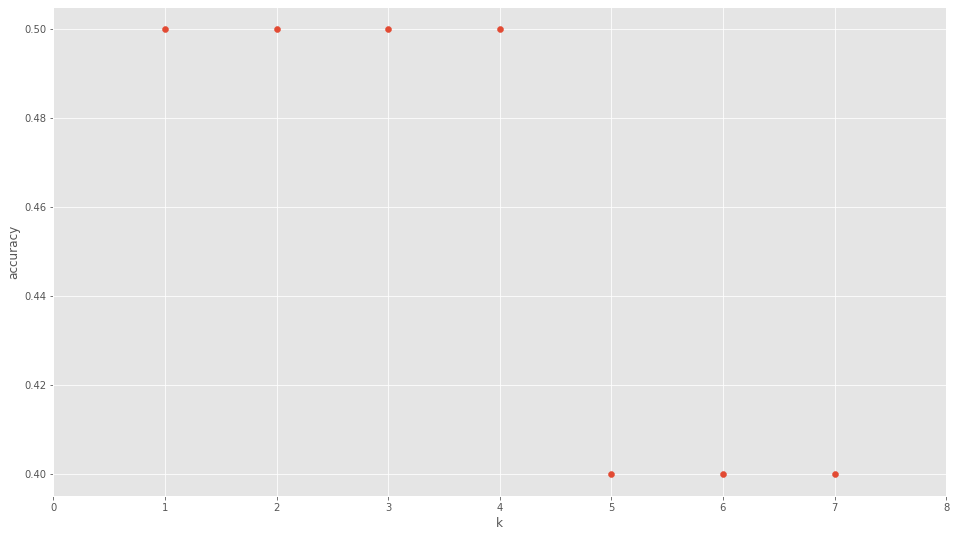

In [20]:
k_range_10_10inst_verbs = range(1, 8)
scores_10_10inst_verbs = []
for k in k_range_10_10inst_verbs:
    knn_10_10inst_verbs = KNeighborsClassifier(n_neighbors = k)
    knn_10_10inst_verbs.fit(X_train_10_10inst_verbs, y_train_10_10inst_verbs)
    scores_10_10inst_verbs.append(knn_10_10inst_verbs.score(X_test_10_10inst_verbs, y_test_10_10inst_verbs))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range_10_10inst_verbs, scores_10_10inst_verbs)
plt.xticks([0,1,2,3,4,5,6,7,8])

# With k = 1

Accuracy of K-NN classifier on training set: 1.00
Accuracy of K-NN classifier on test set: 0.50


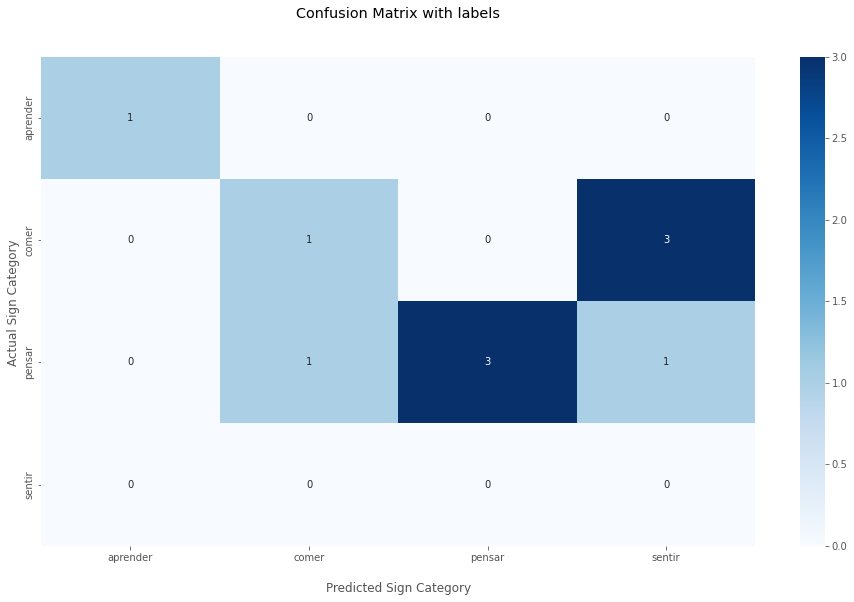

In [21]:
n_neighbors_10_10inst_verbs = 1
 
knn_10_10inst_verbs = KNeighborsClassifier(n_neighbors_10_10inst_verbs)
knn_10_10inst_verbs.fit(X_train_10_10inst_verbs, y_train_10_10inst_verbs)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn_10_10inst_verbs.score(X_train_10_10inst_verbs, y_train_10_10inst_verbs)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn_10_10inst_verbs.score(X_test_10_10inst_verbs, y_test_10_10inst_verbs)))

pred_10_10inst_verbs = knn_10_10inst_verbs.predict(X_test_10_10inst_verbs)
cf_matrix_10_10inst_verbs = confusion_matrix(y_test_10_10inst_verbs, pred_10_10inst_verbs)

import seaborn as sns
import matplotlib.pyplot as plt

ax_10_10inst_verbs = sns.heatmap(cf_matrix_10_10inst_verbs, annot=True, cmap='Blues')

ax_10_10inst_verbs.set_title('Confusion Matrix with labels\n\n');
ax_10_10inst_verbs.set_xlabel('\nPredicted Sign Category')
ax_10_10inst_verbs.set_ylabel('Actual Sign Category ');

## Ticket labels - List must be in alphabetical order

temp1 = ax_10_10inst_verbs.xaxis.set_ticklabels(['aprender' ,'comer', 'pensar', 'sentir'])
temp2 = ax_10_10inst_verbs.yaxis.set_ticklabels(['aprender', 'comer', 'pensar' ,'sentir'])

## Display the visualization of the Confusion Matrix.
plt.show()

# With k = 2

Accuracy of K-NN classifier on training set: 0.80
Accuracy of K-NN classifier on test set: 0.50


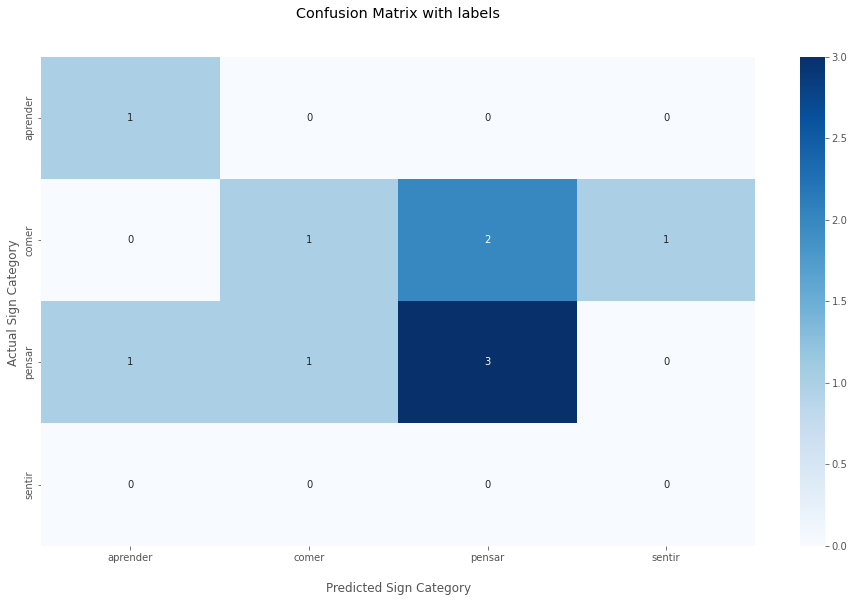

In [22]:
n_neighbors_10_10inst_verbs = 2
 
knn_10_10inst_verbs = KNeighborsClassifier(n_neighbors_10_10inst_verbs)
knn_10_10inst_verbs.fit(X_train_10_10inst_verbs, y_train_10_10inst_verbs)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn_10_10inst_verbs.score(X_train_10_10inst_verbs, y_train_10_10inst_verbs)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn_10_10inst_verbs.score(X_test_10_10inst_verbs, y_test_10_10inst_verbs)))

pred_10_10inst_verbs = knn_10_10inst_verbs.predict(X_test_10_10inst_verbs)
cf_matrix_10_10inst_verbs = confusion_matrix(y_test_10_10inst_verbs, pred_10_10inst_verbs)

import seaborn as sns
import matplotlib.pyplot as plt

ax_10_10inst_verbs = sns.heatmap(cf_matrix_10_10inst_verbs, annot=True, cmap='Blues')

ax_10_10inst_verbs.set_title('Confusion Matrix with labels\n\n');
ax_10_10inst_verbs.set_xlabel('\nPredicted Sign Category')
ax_10_10inst_verbs.set_ylabel('Actual Sign Category ');

## Ticket labels - List must be in alphabetical order

temp1 = ax_10_10inst_verbs.xaxis.set_ticklabels(['aprender' ,'comer', 'pensar', 'sentir'])
temp2 = ax_10_10inst_verbs.yaxis.set_ticklabels(['aprender', 'comer', 'pensar' ,'sentir'])

## Display the visualization of the Confusion Matrix.
plt.show()

# With k = 3

Accuracy of K-NN classifier on training set: 0.83
Accuracy of K-NN classifier on test set: 0.50


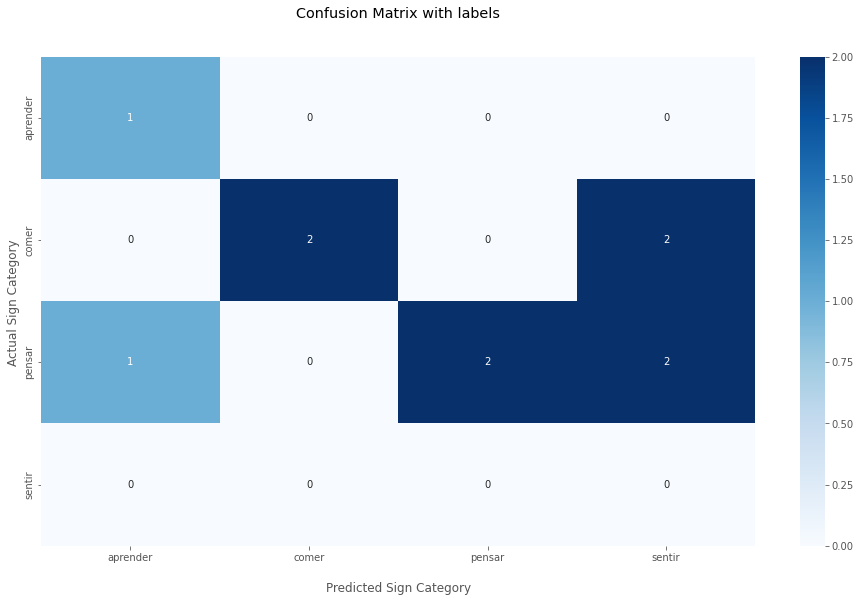

In [23]:
n_neighbors_10_10inst_verbs = 3
 
knn_10_10inst_verbs = KNeighborsClassifier(n_neighbors_10_10inst_verbs)
knn_10_10inst_verbs.fit(X_train_10_10inst_verbs, y_train_10_10inst_verbs)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn_10_10inst_verbs.score(X_train_10_10inst_verbs, y_train_10_10inst_verbs)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn_10_10inst_verbs.score(X_test_10_10inst_verbs, y_test_10_10inst_verbs)))

pred_10_10inst_verbs = knn_10_10inst_verbs.predict(X_test_10_10inst_verbs)
cf_matrix_10_10inst_verbs = confusion_matrix(y_test_10_10inst_verbs, pred_10_10inst_verbs)

import seaborn as sns
import matplotlib.pyplot as plt

ax_10_10inst_verbs = sns.heatmap(cf_matrix_10_10inst_verbs, annot=True, cmap='Blues')

ax_10_10inst_verbs.set_title('Confusion Matrix with labels\n\n');
ax_10_10inst_verbs.set_xlabel('\nPredicted Sign Category')
ax_10_10inst_verbs.set_ylabel('Actual Sign Category ');

## Ticket labels - List must be in alphabetical order

temp1 = ax_10_10inst_verbs.xaxis.set_ticklabels(['aprender' ,'comer', 'pensar', 'sentir'])
temp2 = ax_10_10inst_verbs.yaxis.set_ticklabels(['aprender', 'comer', 'pensar' ,'sentir'])

## Display the visualization of the Confusion Matrix.
plt.show()

# With k = 5

Accuracy of K-NN classifier on training set: 0.60
Accuracy of K-NN classifier on test set: 0.40


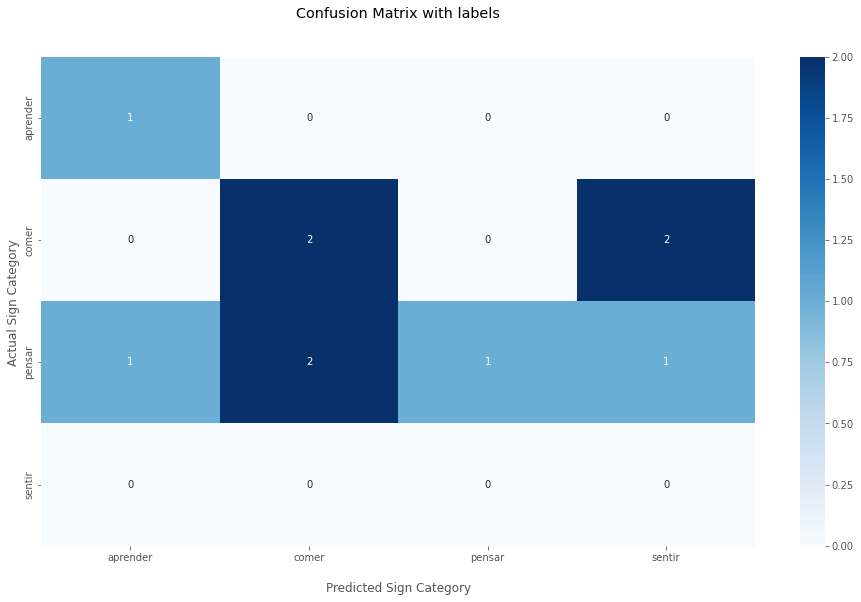

In [24]:
n_neighbors_10_10inst_verbs = 5
 
knn_10_10inst_verbs = KNeighborsClassifier(n_neighbors_10_10inst_verbs)
knn_10_10inst_verbs.fit(X_train_10_10inst_verbs, y_train_10_10inst_verbs)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn_10_10inst_verbs.score(X_train_10_10inst_verbs, y_train_10_10inst_verbs)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn_10_10inst_verbs.score(X_test_10_10inst_verbs, y_test_10_10inst_verbs)))

pred_10_10inst_verbs = knn_10_10inst_verbs.predict(X_test_10_10inst_verbs)
cf_matrix_10_10inst_verbs = confusion_matrix(y_test_10_10inst_verbs, pred_10_10inst_verbs)

import seaborn as sns
import matplotlib.pyplot as plt

ax_10_10inst_verbs = sns.heatmap(cf_matrix_10_10inst_verbs, annot=True, cmap='Blues')

ax_10_10inst_verbs.set_title('Confusion Matrix with labels\n\n');
ax_10_10inst_verbs.set_xlabel('\nPredicted Sign Category')
ax_10_10inst_verbs.set_ylabel('Actual Sign Category ');

## Ticket labels - List must be in alphabetical order

temp1 = ax_10_10inst_verbs.xaxis.set_ticklabels(['aprender' ,'comer', 'pensar', 'sentir'])
temp2 = ax_10_10inst_verbs.yaxis.set_ticklabels(['aprender', 'comer', 'pensar' ,'sentir'])

## Display the visualization of the Confusion Matrix.
plt.show()